In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#write a query to get all dates, precipitation and temps across the years and stations for month of december
december_results =  []
december_results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == 12).\
group_by(Measurement.date).all()
december_results

[('2010-12-01', 76.0, 0.04),
 ('2010-12-02', 72.0, 0.13),
 ('2010-12-03', 74.0, 0.0),
 ('2010-12-04', 74.0, 0.0),
 ('2010-12-05', 73.0, 0.0),
 ('2010-12-06', 64.0, 0.0),
 ('2010-12-07', 64.0, 0.0),
 ('2010-12-08', 67.0, 0.0),
 ('2010-12-09', 77.0, 0.0),
 ('2010-12-10', 66.0, 1.58),
 ('2010-12-11', 69.0, 0.77),
 ('2010-12-12', 68.0, 0.0),
 ('2010-12-13', 68.0, 0.0),
 ('2010-12-14', 71.0, 0.0),
 ('2010-12-15', 74.0, 0.0),
 ('2010-12-16', 67.0, 0.0),
 ('2010-12-17', 66.0, 0.0),
 ('2010-12-18', 69.0, 0.0),
 ('2010-12-19', 71.0, 1.4),
 ('2010-12-20', 71.0, 4.94),
 ('2010-12-21', 71.0, 0.43),
 ('2010-12-22', 71.0, 0.01),
 ('2010-12-23', 70.0, 0.0),
 ('2010-12-24', 70.0, 0.0),
 ('2010-12-25', 69.0, 2.95),
 ('2010-12-26', 74.0, None),
 ('2010-12-27', 74.0, 0.13),
 ('2010-12-28', 71.0, 0.55),
 ('2010-12-29', 75.0, 0.06),
 ('2010-12-30', 75.0, 0.01),
 ('2010-12-31', 72.0, 0.0),
 ('2011-12-01', 69.0, 0.03),
 ('2011-12-02', 68.0, 0.08),
 ('2011-12-03', 73.0, 0.0),
 ('2011-12-04', 74.0, 0.0),
 ('20

In [11]:
#write a query to get all dates, precipitation and temps across the years and stations for month of june
june_results =  []
june_results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(extract('month', Measurement.date) == 6).\
group_by(Measurement.date).all()
june_results

[('2010-06-01', 78.0, 0.0),
 ('2010-06-02', 76.0, 0.01),
 ('2010-06-03', 78.0, 0.0),
 ('2010-06-04', 76.0, 0.0),
 ('2010-06-05', 77.0, 0.0),
 ('2010-06-06', 78.0, 0.0),
 ('2010-06-07', 77.0, 0.0),
 ('2010-06-08', 78.0, 0.0),
 ('2010-06-09', 78.0, 0.0),
 ('2010-06-10', 79.0, 0.0),
 ('2010-06-11', 78.0, 0.0),
 ('2010-06-12', 78.0, 0.0),
 ('2010-06-13', 78.0, 0.0),
 ('2010-06-14', 77.0, 0.0),
 ('2010-06-15', 78.0, 0.0),
 ('2010-06-16', 78.0, 0.0),
 ('2010-06-17', 77.0, 0.0),
 ('2010-06-18', 77.0, 0.0),
 ('2010-06-19', 82.0, 0.0),
 ('2010-06-20', 78.0, 0.0),
 ('2010-06-21', 78.0, 0.0),
 ('2010-06-22', 78.0, 0.0),
 ('2010-06-23', 78.0, 0.0),
 ('2010-06-24', 78.0, 0.0),
 ('2010-06-25', 77.0, 0.0),
 ('2010-06-26', 76.0, 0.02),
 ('2010-06-27', 78.0, 0.0),
 ('2010-06-28', 78.0, 0.0),
 ('2010-06-29', 78.0, 0.0),
 ('2010-06-30', 78.0, 0.0),
 ('2011-06-01', 77.0, 0.07),
 ('2011-06-02', 78.0, 0.0),
 ('2011-06-03', 73.0, 0.56),
 ('2011-06-04', 70.0, 0.89),
 ('2011-06-05', 76.0, 0.0),
 ('2011-06-06',

In [12]:
#make a dataframe from the results for the month of december
december_df = pd.DataFrame(december_results, columns=['date','tobs','precipitation'])
december_df = december_df.sort_index()
december_df.head()

,date,tobs,precipitation
0,2010-12-01,76.0,0.04
1,2010-12-02,72.0,0.13
2,2010-12-03,74.0,0.00
3,2010-12-04,74.0,0.00
4,2010-12-05,73.0,0.00


In [13]:
#make a dataframe from the results for the month of june
june_df = pd.DataFrame(june_results, columns=['date','tobs','precipitation'])
june_df = june_df.sort_index()
june_df.head()

,date,tobs,precipitation
0,2010-06-01,78.0,0.00
1,2010-06-02,76.0,0.01
2,2010-06-03,78.0,0.00
3,2010-06-04,76.0,0.00
4,2010-06-05,77.0,0.00


In [14]:
#get stats for december
december_df.describe()

,tobs,precipitation
count,217.000000,214.000000
mean,71.119816,0.112383
std,3.504550,0.454108
min,56.000000,0.000000
25%,69.000000,0.000000
50%,72.000000,0.000000
75%,74.000000,0.040000
max,77.000000,4.940000


In [15]:
#get stats for june
june_df.describe()

,tobs,precipitation
count,240.000000,237.000000
mean,77.491667,0.023586
std,1.881404,0.089633
min,70.000000,0.000000
25%,77.000000,0.000000
50%,78.000000,0.000000
75%,79.000000,0.010000
max,84.000000,0.890000


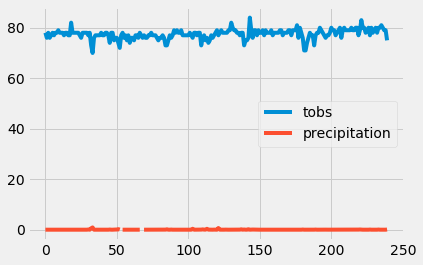

In [16]:
#plot the month of june
june_df.plot()

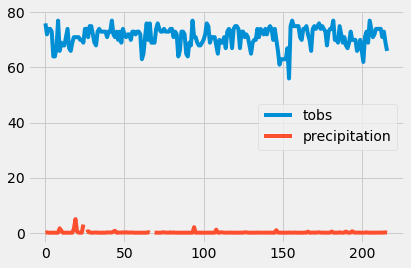

In [17]:
#plot the month of december
december_df.plot()

In [19]:
session.query(Measurement.station).count()

19550